In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as pre
from scipy.special import inv_boxcox
from scipy.stats import boxcox

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

import datetime
import math

## Data Profiling

In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Cleaning

#### Drop Duplicates

In [6]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


#### Drop Null Customer ID

In [7]:
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


## EDA

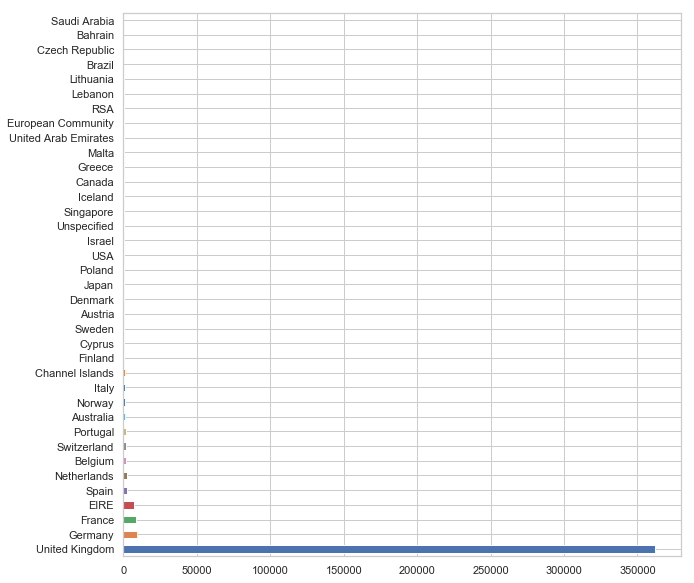

In [141]:
eda = df.Country.value_counts()
eda.plot(kind='barh')

## Feature Engineering

#### Recency

In [143]:
refrence_date = df.InvoiceDate.max() + datetime.timedelta(days = 1)
print('Reference Date:', refrence_date)
df['Recency'] = (refrence_date - df.InvoiceDate).astype('timedelta64[D]')
RFM =  df[['CustomerID', 'Recency']].groupby("CustomerID").min().reset_index()
RFM.describe().transpose()

Reference Date: 2011-12-10 12:50:00


,count,mean,std,min,25%,50%,75%,max
CustomerID,4372.0,15299.677722,1722.390705,12346.0,13812.75,15300.5,16778.25,18287.0
Recency,4372.0,92.047118,100.765435,1.0,17.00,50.0,143.00,374.0


#### Frequency

In [144]:
customer_freq = (df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
RFM = RFM.merge(customer_freq)
RFM.head()

,CustomerID,Recency,frequency
0,12346.0,326.0,2
1,12347.0,2.0,7
2,12348.0,75.0,4
3,12349.0,19.0,1
4,12350.0,310.0,1


### Monetary

In [142]:
df['Monetary'] = df.Quantity*df.UnitPrice

In [145]:
customer_monetary_val = df[['CustomerID', 'Monetary']].groupby("CustomerID").sum().reset_index()
RFM = RFM.merge(customer_monetary_val)
RFM.head()

,CustomerID,Recency,frequency,Monetary
0,12346.0,326.0,2,0.00
1,12347.0,2.0,7,4310.00
2,12348.0,75.0,4,1797.24
3,12349.0,19.0,1,1757.55
4,12350.0,310.0,1,334.40


In [146]:
RFM.describe()

,CustomerID,Recency,frequency,Monetary
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.047118,5.075480,1898.459701
std,1722.390705,100.765435,9.338754,8219.345141
min,12346.000000,1.000000,1.000000,-4287.630000
25%,13812.750000,17.000000,1.000000,293.362500
50%,15300.500000,50.000000,3.000000,648.075000
75%,16778.250000,143.000000,5.000000,1611.725000
max,18287.000000,374.000000,248.000000,279489.020000


## Drop Negative Values

In [147]:
print('Check register with UnitPrice negative:')
display(RFM[(RFM.Monetary<0)])

Check register with UnitPrice negative:


,CustomerID,Recency,frequency,Monetary
89,12454.0,53.0,2,-5.684342e-14
125,12503.0,338.0,1,-1.126000e+03
127,12505.0,301.0,1,-4.500000e+00
212,12605.0,365.0,1,-7.500000e+00
264,12666.0,359.0,1,-2.274400e+02
415,12870.0,366.0,1,-1.490000e+01
467,12943.0,301.0,1,-3.750000e+00
619,13154.0,144.0,1,-6.118600e+02
991,13672.0,301.0,6,-7.146000e+01
1004,13693.0,325.0,2,-3.200000e+01


## Drop Negative values

In [148]:
RFM.drop(RFM[RFM['Monetary'] < 0].index, inplace=True)

In [149]:
RFM

,CustomerID,Recency,frequency,Monetary
0,12346.0,326.0,2,0.000000e+00
1,12347.0,2.0,7,4.310000e+03
2,12348.0,75.0,4,1.797240e+03
3,12349.0,19.0,1,1.757550e+03
4,12350.0,310.0,1,3.344000e+02
5,12352.0,36.0,11,1.545410e+03
6,12353.0,204.0,1,8.900000e+01
7,12354.0,232.0,1,1.079400e+03
8,12355.0,214.0,1,4.594000e+02
9,12356.0,23.0,3,2.811430e+03


Skew Value : 1.267581310836697
Skew Value : 11.371825727216486
Skew Value : 21.616347164374872


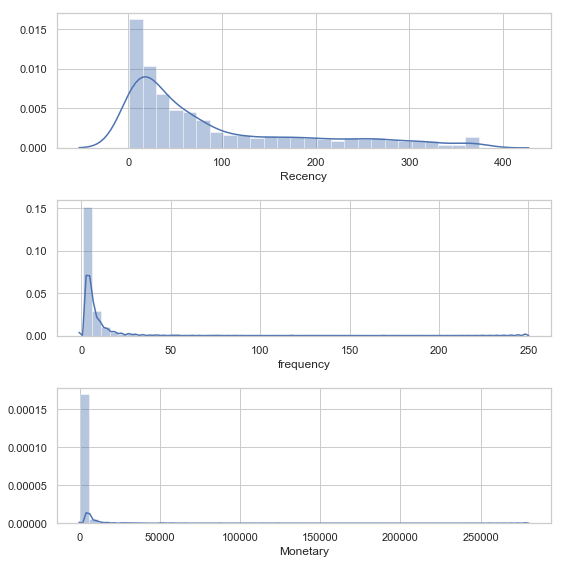

In [150]:
## Scalling

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
print('Skew Value : ' + str(RFM.Recency.skew()))
sns.distplot(RFM["Recency"], ax=ax1)
print('Skew Value : ' + str(RFM['frequency'].skew()))
sns.distplot(RFM["frequency"], ax=ax2)
print('Skew Value : ' + str(RFM.Monetary.skew()))
sns.distplot(RFM["Monetary"], ax=ax3)
plt.tight_layout()

In [151]:
def scalling(df, column):
    f = plt.figure(figsize=(15,13))

    # log 1 Transform
    ax = f.add_subplot(221)
    L1p = np.log1p(df[column])
    sns.distplot(L1p,color='b',ax=ax)
    ax.set_title('skew value Log 1 transform: ' + str(np.log1p(df[column]).skew()))

    # Square Log Transform
    ax = f.add_subplot(222)
    SRT = np.sqrt(df[column])
    sns.distplot(SRT,color='c',ax=ax)
    ax.set_title('Skew Value Square Transform: ' + str(np.sqrt(df[column]).skew()))

    # Log Transform
    ax = f.add_subplot(223)
    LT = np.log(df[column])
    sns.distplot(LT, color='r',ax=ax)
    ax.set_title('Skew value Log Transform: ' + str(np.log(df[column]).skew()))

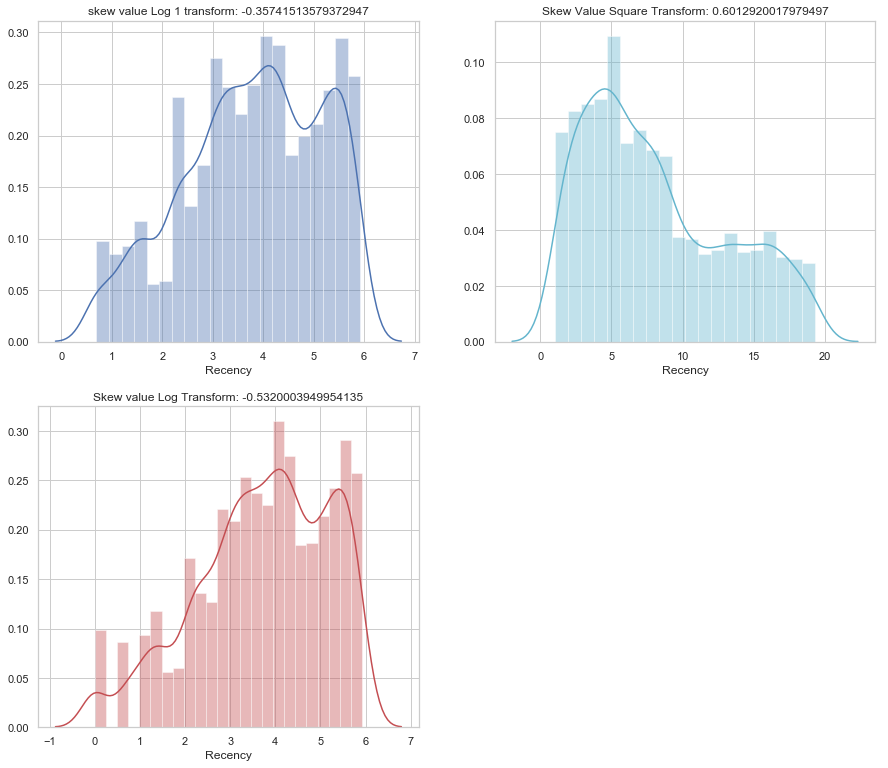

In [152]:
scalling(RFM, 'Recency')

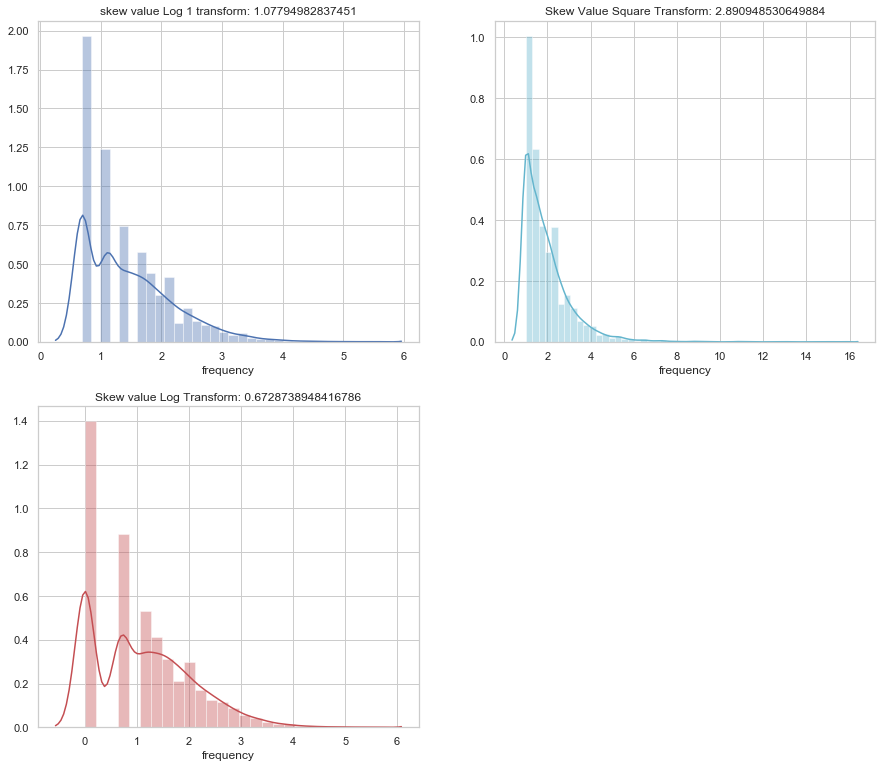

In [153]:
scalling(RFM, 'frequency')

In [164]:
## Apply Transformation

RFM['Recency'] = np.log(RFM['Recency'])
RFM['frequency'] = np.log1p(RFM['frequency'])
RFM.head()

,CustomerID,Recency,frequency,Monetary,label
0,12346.0,1.755596,0.741276,0.00,0
1,12347.0,-0.366513,1.124748,4310.00,0
2,12348.0,1.462674,0.959135,1797.24,0
3,12349.0,1.079918,0.526589,1757.55,0
4,12350.0,1.746862,0.526589,334.40,0


# Modeling

In [155]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

In [156]:
distortions = []
mapping1 = {}
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(RFM)
    kmeanModel.fit(RFM)

    distortions.append(sum(np.min(cdist(RFM, kmeanModel.cluster_centers_, 
                    'euclidean'),axis=1)) / RFM.shape[0]) 

    mapping1[k] = sum(np.min(cdist(RFM, kmeanModel.cluster_centers_, 
                'euclidean'),axis=1)) / RFM.shape[0] 


In [157]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 2836.554812182992
2 : 2581.2077575974895
3 : 2387.0134158375613
4 : 2132.2637840423968
5 : 1972.3635675897926
6 : 1404.0955272120218
7 : 1314.2339393258906
8 : 1295.9677053441283
9 : 1197.1058517163096


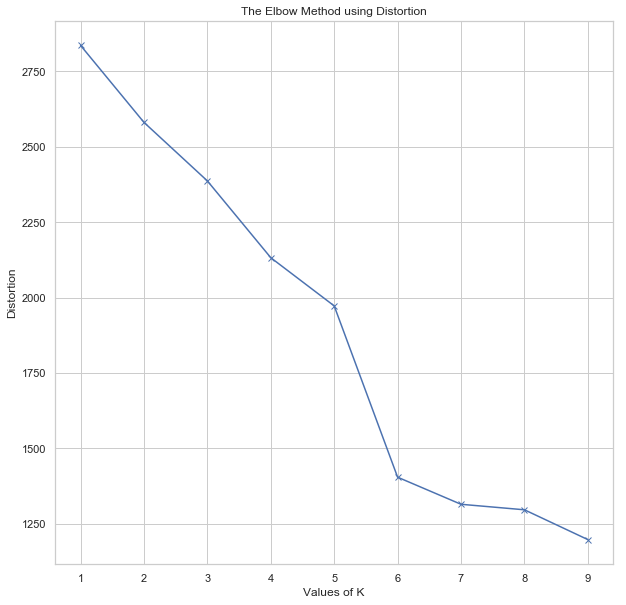

In [158]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [159]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(RFM)
y_pred = kmeans.predict(RFM)
print(kmeans.cluster_centers_)

[[1.38216101e+04 3.78016876e+00 1.37701813e+00 1.12303472e+03]
 [1.47330000e+04 1.89002012e+00 4.26083352e+00 1.39291095e+05]
 [1.54268095e+04 1.35909325e+00 3.93955868e+00 4.77629162e+04]
 [1.67870707e+04 3.82429172e+00 1.35385662e+00 9.81572381e+02]
 [1.48251475e+04 2.12195405e+00 2.94247397e+00 1.03040627e+04]
 [1.63740000e+04 3.46573590e-01 4.24992178e+00 2.67963755e+05]]


In [160]:
RFM["label"] = kmeans.labels_
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374.0


Text(0.5, 0, 'Monetary')

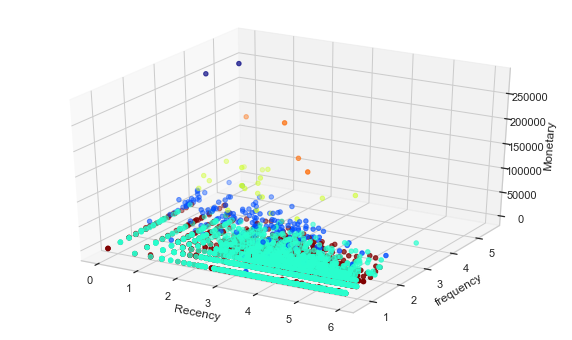

In [162]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFM["Recency"], RFM["frequency"], RFM["Monetary"], c=y_pred, cmap='jet_r')
ax.set_xlabel("Recency")
ax.set_ylabel("frequency")
ax.set_zlabel("Monetary")

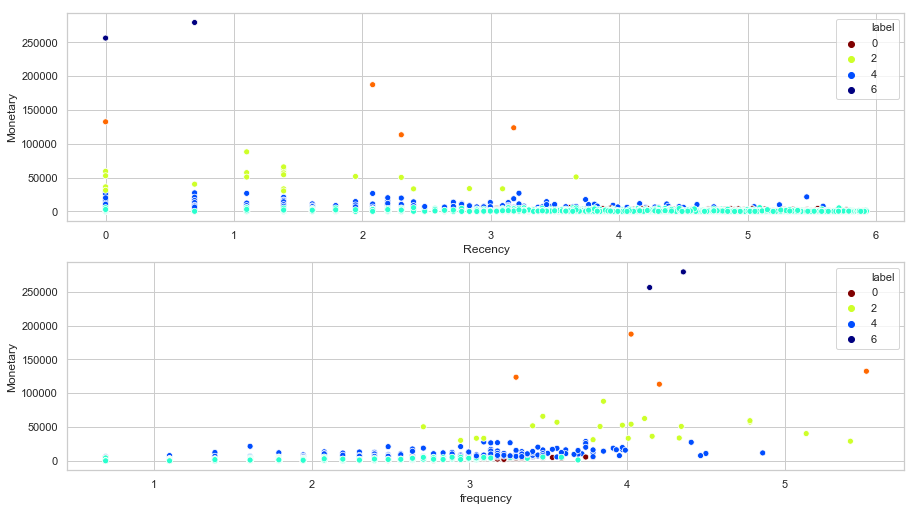

In [163]:
## Detailed Overview

f = plt.figure(figsize=(15,13))
ax = f.add_subplot(311)
ax = sns.scatterplot(x="Recency", y="Monetary", hue='label', data=RFM, palette="jet_r")
ax = f.add_subplot(312)
ax = sns.scatterplot(x="frequency", y="Monetary", hue='label', data=RFM, palette="jet_r")